In [13]:
import matplotlib.pyplot as plt
import re
import math

In [14]:
def get_data(file):
    block_sizes = []
    n_loads = 26908
    bytes_per_memref = []
    with open(file, 'r') as f:
        for line in f:
            if "block_size" in line:
                beg = re.search(r"\d", line).start()
                end = line.index("B")
                block_sizes.append(math.log(int(line[beg:end]), 2))
            if "B_total_traffic_wb" in line:
                beg = re.search(r"\d", line).start()
                bytes_per_memref.append(round((int(line[beg:])/n_loads),2))
    return block_sizes, bytes_per_memref

In [15]:
def plot_wb_wt(x, y):
    plt.plot(x, y, color='hotpink')
    plt.xlabel("Block Size (2^x Bytes)")
    plt.ylabel("Bytes/Reference")
    plt.title("Block Size vs. Memory Traffic")
    plt.show()

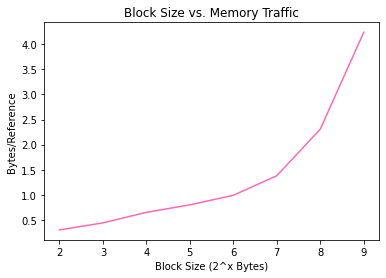

In [16]:
if __name__ == "__main__":
    block_sizes, bytes_per_memref = get_data("log.txt")
    plot_wb_wt(block_sizes, bytes_per_memref)